## Fitting Peak Flow Data from Russian River Basins to a Pearson-III Distribution Using the Method of Moments to Quantify Extremeness of Years
by Arman Omidvar

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearson3
import matplotlib.pyplot as plt
from scipy.special import gammaln


use_7_day_average = True


In this notebook we are interested in examining and contextualizing the positive extremeness of a water year i.e., based on the maximum flow which occurred during this year, how does this year compare to the other years in our data set. Additionally, how much more extreme is this year compared to other years in our dataset.

In the same vein, we are also interested in min flows. That analysis will be done in another notebook.

According to various sources outlined below, we find a Pearson-III distribution to be suitable for modeling peak flows.

## Calculate Method of Moments estimator for pearson-III distribution 

### Calculate sample skew and weighted skew

We need to calculate weighted skew according to USGS Bulletin 17C.

We do this by computing the sample skew from our data, and adjusting given the regional skew.

We find regional skew to be -0.555  
We find regional MSE of regional skew to be 0.13  

According to table 1 of Regional skew for California, and flood frequency for selected sites in the Sacramento-San Joaquin River Basin, based on data through water year 2006  
By: Charles Parrett, Andrea Veilleux, J.R. Stedinger, N.A. Barth, Donna L. Knifong, and J.C. Ferris

For station MSE, we use the approximate variance of the sample skewness i.e. $MSE_{station} \approx Var(G_1) \approx \frac{6}{n}$

In [2]:
def sample_skew(peak_flows):
    """
    Calculate the station skew for a basin based on a sample of peak flow measurements.
    """
    n = len(peak_flows)
    log_peak_flows = np.log10(peak_flows)
    std = np.std(log_peak_flows, ddof=1)
    mean = np.mean(log_peak_flows)

    return (np.sum((log_peak_flows - mean) ** 3) * n) / ((n - 1) * (n - 2) * (std ** 3))


def weighted_skew(peak_flows, G_reg, MSE_reg):
    "calculates the weighted skew according to USGS Bulletin 17C"
    G_sta = sample_skew(peak_flows)
    G_reg = G_reg
    MSE_reg = MSE_reg
    n = len(peak_flows)
    MSE_sta = 6 / n

    return ((G_sta/MSE_sta) + (G_reg/MSE_reg)) / ((1/MSE_sta) + (1/MSE_reg))

### Estimate mu and sigma using method of moments

According to Bulletin #17C, the pdf of log-Pearson type III distribution is:  

$f(x \mid \tau, \alpha, \beta)
= \frac{1}{|\beta| \, \Gamma(\alpha)}
\left( \frac{x - \tau}{\beta} \right)^{\alpha - 1}
\exp\!\left[-\,\frac{x - \tau}{\beta}\right]$

We can already calculated the third moment using the weightedSkew function, as well as the MOM estimate of alpha given the third moment using the pearsonIII_alpha_estimate

The first and second moments are just the mean and standard deviation of the logged peak flow values

Now we calculate the MOM estimates of $\alpha$, $\beta$ and $\tau$

In [3]:
def pearsonIII_alpha_estimate(G_weighted):
    """
    Compute the MOM estimate of the alpha parameter for a Pearson-III distribution based on the weighted skew.
    """
    alpha = (4 / (G_weighted ** 2))
    return alpha

def pearsonIII_beta_estimate(sample_skew, standard_error, alpha_hat):
    """
    Compute the MOM estimate of the beta parameter for a Pearson-III distribution.
    """
    beta_hat = np.sign(sample_skew) * (standard_error ** 2 / alpha_hat) ** 0.5
    return beta_hat

def pearsonIII_tau_estimate(mean_log_peak_flows, beta_hat, alpha_hat):
    """
    Compute the MOM estimate of the tau parameter for a Pearson-III distribution.
    """
    tau_hat = mean_log_peak_flows - (alpha_hat * beta_hat)
    return tau_hat

## Fitting our distribution

Now that we have estimates for all the parameters, we can fit and plot our distribution for each basin

Basin: Calpella
alpha_hat: 31.28966238356459, beta_hat: 0.0331245066481355, tau_hat: 2.2704437252681062


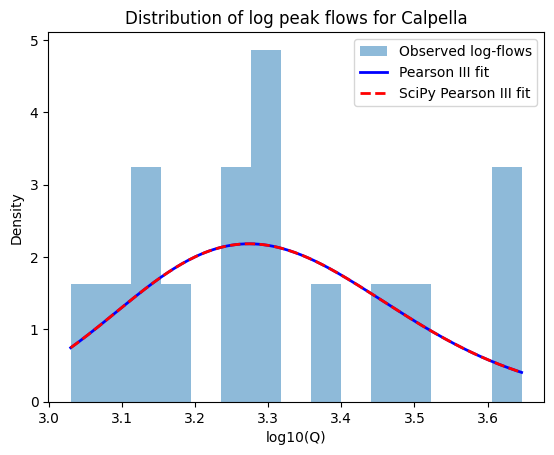

C:\Users\arman\AppData\Local\Temp\ipykernel_37332\362961688.py:84: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data[basin]['Date'] = pd.to_datetime(all_data[basin]['Date'])


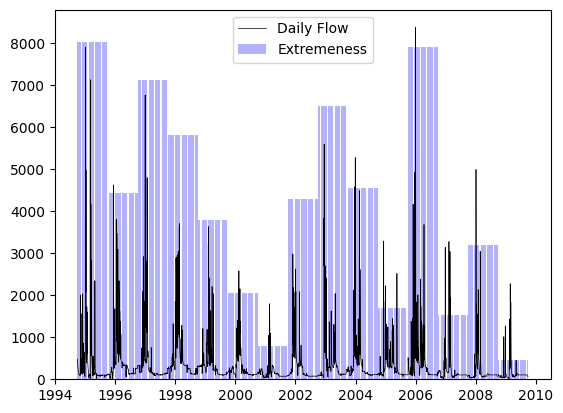

<Figure size 30000x10000 with 0 Axes>

Basin: Guerneville
alpha_hat: 32.49578419153299, beta_hat: 0.030623318549341152, tau_hat: 3.3500771410037675


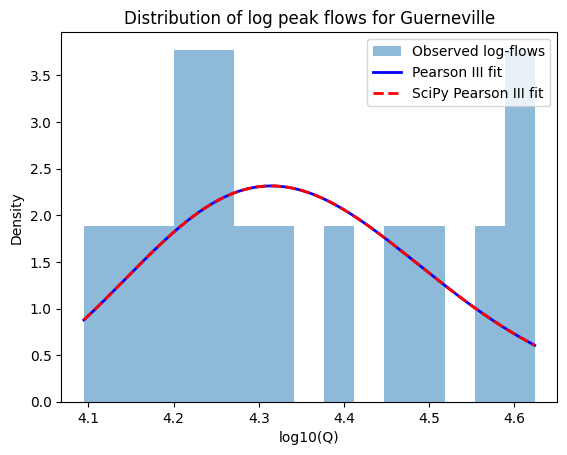

C:\Users\arman\AppData\Local\Temp\ipykernel_37332\362961688.py:84: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data[basin]['Date'] = pd.to_datetime(all_data[basin]['Date'])


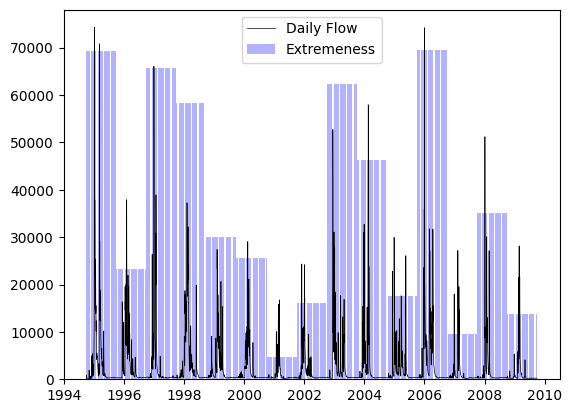

<Figure size 30000x10000 with 0 Axes>

Basin: Hopland
alpha_hat: 39.8705106621709, beta_hat: 0.031172872790531332, tau_hat: 2.4897129260580666


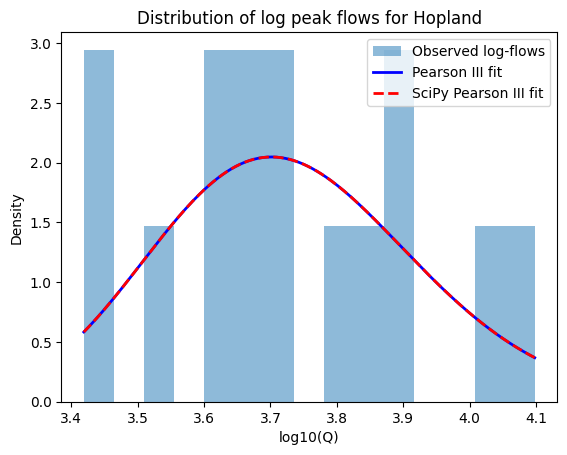

C:\Users\arman\AppData\Local\Temp\ipykernel_37332\362961688.py:84: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data[basin]['Date'] = pd.to_datetime(all_data[basin]['Date'])


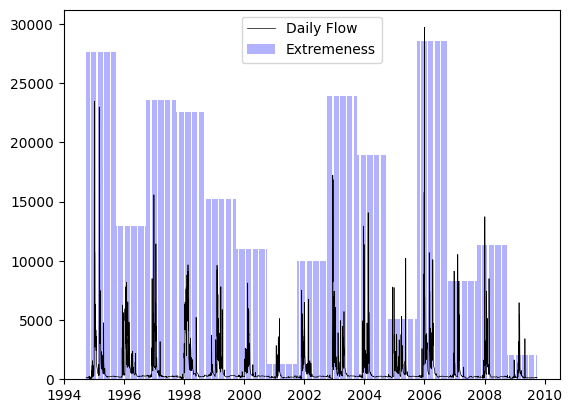

<Figure size 30000x10000 with 0 Axes>

Basin: Warm Springs
alpha_hat: 35.92302066829195, beta_hat: 0.027805722917567718, tau_hat: 2.4895049597561685


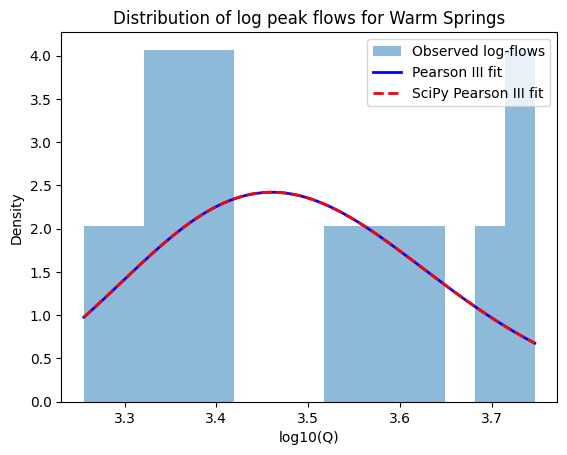

C:\Users\arman\AppData\Local\Temp\ipykernel_37332\362961688.py:84: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data[basin]['Date'] = pd.to_datetime(all_data[basin]['Date'])


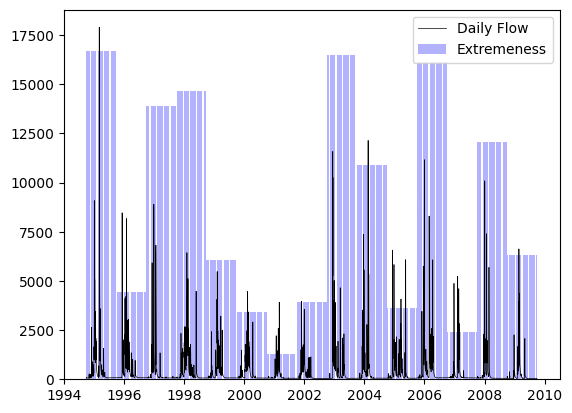

<Figure size 30000x10000 with 0 Axes>

In [ ]:
if not use_7_day_average:
    calpella_peak_flows = pd.read_csv('russian_river_peak_flows/Calpella.csv')
    guerneville_peak_flows = pd.read_csv('russian_river_peak_flows/Guerneville.csv')
    hopland_peak_flows = pd.read_csv('russian_river_peak_flows/Hopland.csv')
    warmsprings_peak_flows = pd.read_csv('russian_river_peak_flows/Warm.csv')
else:
    calpella_peak_flows = pd.read_csv('russian_river_peak_flows(7d-avg)/Calpella.csv')
    guerneville_peak_flows = pd.read_csv('russian_river_peak_flows(7d-avg)/Guerneville.csv')
    hopland_peak_flows = pd.read_csv('russian_river_peak_flows(7d-avg)/Hopland.csv')
    warmsprings_peak_flows = pd.read_csv('russian_river_peak_flows(7d-avg)/Warm.csv')

calpella_all_data = pd.read_csv('russian_river_data/Calpella_daily.csv')
guerneville_all_data = pd.read_csv('russian_river_data/Guerneville_daily.csv')
hopland_all_data = pd.read_csv('russian_river_data/Hopland_daily.csv')
warmsprings_all_data = pd.read_csv('russian_river_data/WarmSprings_Inflow_daily.csv')

if not use_7_day_average:
    peak_flows = {'Calpella': calpella_peak_flows['Calpella Gage FLOW'].values,
                'Guerneville': guerneville_peak_flows['Guerneville Gage FLOW'].values,
                'Hopland': hopland_peak_flows['Hopland Gage FLOW'].values,
                'Warm Springs': warmsprings_peak_flows['Warm Springs Dam Inflow FLOW'].values}
else:
    peak_flows = {'Calpella': calpella_peak_flows['mav'].values,
                'Guerneville': guerneville_peak_flows['mav'].values,
                'Hopland': hopland_peak_flows['mav'].values,
                'Warm Springs': warmsprings_peak_flows['mav'].values}

all_data = {'Calpella': calpella_all_data,
            'Guerneville': guerneville_all_data,
            'Hopland': hopland_all_data,
            'Warm Springs': warmsprings_all_data}


extreme_years = pd.DataFrame()
extreme_years['water_year'] = calpella_peak_flows['water_year']

def pearson3_pdf(x, alpha, beta, tau):
    x = np.asarray(x, dtype=float)

    if alpha <= 0 or beta == 0:
        return np.full_like(x, np.nan)

    z = (x - tau) / beta
    mask = z > 0

    out = np.zeros_like(x, dtype=float)
    logpdf = -np.log(abs(beta)) - gammaln(alpha) + (alpha - 1)*np.log(z[mask]) - z[mask]
    out[mask] = np.exp(logpdf)
    return out

for basin in peak_flows.keys():
    basin_peak_flows = peak_flows[basin]
    G_station = sample_skew(basin_peak_flows)
    G_weighted = weighted_skew(basin_peak_flows, G_reg=0.333, MSE_reg=0.13)

    log_flows = np.log10(basin_peak_flows)
    mean_log_flows = np.mean(log_flows)
    std_log_flows = np.std(log_flows, ddof=1)

    alpha_hat = pearsonIII_alpha_estimate(G_weighted)
    beta_hat = pearsonIII_beta_estimate(G_station, std_log_flows, alpha_hat)
    tau_hat = pearsonIII_tau_estimate(mean_log_flows, beta_hat, alpha_hat)

    print(f'Basin: {basin}')
    print(f'alpha_hat: {alpha_hat}, beta_hat: {beta_hat}, tau_hat: {tau_hat}')

    dist = pearson3(G_weighted, loc=mean_log_flows, scale=std_log_flows)
    x = np.linspace(min(log_flows), max(log_flows), 200)
    scipy_pdf_vals = dist.pdf(x)
    my_pdf_vals = pearson3_pdf(x, alpha_hat, beta_hat, tau_hat)

    extreme_years[basin] = dist.cdf(np.log10(basin_peak_flows))

    plt.hist(log_flows, bins=15, density=True, alpha=0.5, label='Observed log-flows')
    plt.plot(x, my_pdf_vals, 'b-', lw=2, label='Pearson III fit')
    plt.plot(x, scipy_pdf_vals, 'r--', lw=2, label='SciPy Pearson III fit')
    plt.xlabel('log10(Q)')
    plt.ylabel('Density')
    plt.title(f'Distribution of log peak flows for {basin}')
    plt.legend()
    plt.show()


    all_data[basin]['Date'] = pd.to_datetime(all_data[basin]['Date'])
    peak_flow_df = all_data[basin].copy()
    peak_flow_df['water_year'] = np.where(peak_flow_df['Date'].dt.month >= 10, peak_flow_df['Date'].dt.year + 1, peak_flow_df['Date'].dt.year)
    peak_flow_df['peak_flow'] = None
    peak_flow_df['extremeness'] = None
    for i, year in enumerate(peak_flow_df['water_year'].unique()):
        peak_flow_df.loc[peak_flow_df['water_year'] == year, 'peak_flow'] = basin_peak_flows[i]
        peak_flow_df.loc[peak_flow_df['water_year'] == year, 'extremeness'] = extreme_years[basin].iloc[i]


    plt.bar(
        peak_flow_df['Date'],
        peak_flow_df['extremeness'] * max(all_data[basin].iloc[:, 3]),
        color="blue",
        alpha=0.3,
        label="Extremeness"
    )

    # plt.plot(
    #     peak_flow_df['Date'],
    #     peak_flow_df['peak_flow'],
    #     color="blue",
    #     marker="_",
    #     linestyle='',
    #     label="Yearly Peak Flow"
    # )

    plt.plot(
        all_data[basin]['Date'],
        all_data[basin].iloc[:, 3],
        color="black",
        linewidth=0.5,
        label="Daily Flow",
    )

    plt.legend()
    plt.figure(figsize=(300, 100))
    plt.show()

## Quantify Extremeness

For each year, we find $\Pr(\text{random peak flow} \geq \text{the peak flow from that year})$ using the CDF

In [5]:
extreme_years.to_csv('peak_flow_analysis.csv', index=False)
print(extreme_years)

    water_year  Calpella  Guerneville   Hopland  Warm Springs
0         1995  0.957493     0.933828  0.929190      0.931872
1         1996  0.529141     0.314015  0.436852      0.249129
2         1997  0.850167     0.884073  0.794697      0.775217
3         1998  0.695043     0.784777  0.758042      0.818954
4         1999  0.452357     0.404254  0.511145      0.339090
5         2000  0.244650     0.343657  0.370852      0.190769
6         2001  0.095936     0.064462  0.044803      0.071341
7         2002  0.512313     0.216241  0.336879      0.219428
8         2003  0.776402     0.838925  0.804927      0.922391
9         2004  0.543472     0.621835  0.635968      0.607395
10        2005  0.202816     0.236221  0.171555      0.203073
11        2006  0.943162     0.936535  0.960081      0.900753
12        2007  0.181250     0.128495  0.278112      0.134042
13        2008  0.381747     0.473525  0.380566      0.673134
14        2009  0.055550     0.186329  0.069713      0.354037


Rank years by peak flow extremeness

In [6]:
basins = [col for col in extreme_years.columns if col != "water_year"]

for basin in basins:
    print(f"\n=== {basin} (highest → lowest extremeness) ===")
    
    ranked = (
        extreme_years[["water_year", basin]]
        .sort_values(by=basin, ascending=False)  # highest = most extreme
        .reset_index(drop=True)
    )
    
    ranked["rank"] = ranked.index + 1
    
    print(ranked[["rank", "water_year", basin]])


=== Calpella (highest → lowest extremeness) ===
    rank  water_year  Calpella
0      1        1995  0.957493
1      2        2006  0.943162
2      3        1997  0.850167
3      4        2003  0.776402
4      5        1998  0.695043
5      6        2004  0.543472
6      7        1996  0.529141
7      8        2002  0.512313
8      9        1999  0.452357
9     10        2008  0.381747
10    11        2000  0.244650
11    12        2005  0.202816
12    13        2007  0.181250
13    14        2001  0.095936
14    15        2009  0.055550

=== Guerneville (highest → lowest extremeness) ===
    rank  water_year  Guerneville
0      1        2006     0.936535
1      2        1995     0.933828
2      3        1997     0.884073
3      4        2003     0.838925
4      5        1998     0.784777
5      6        2004     0.621835
6      7        2008     0.473525
7      8        1999     0.404254
8      9        2000     0.343657
9     10        1996     0.314015
10    11        2005     0.23